In [ ]:
'''
농구선수 기록 및 연봉 데이터

 - NBA Salaries(1990-2023)          :   1990년부터 2021년까지의 시즌별 NBA 농구선수 연봉 데이터
 - NBA Player Stats(1950 - 2022)    :   1950년부터 2022년까지의 시즌별 NBA 농구선수 기록

컬럼 설명 : 

 - Season = 시즌(연도)
 - Player = 선수명
 - Pos = 포지션
 - Age = 나이
 - Tm = 소속팀
 - G = 경기수
 - GS = 주전으로 시작한 경기수
 - MP = 총 경기시간(분)
 - FG = 슛 성공(2점 & 3점슛 포함)
 - FGA = 슛 시도(2점 & 3점슛 포함)
 - FG% = 슛 성공률(2점 & 3점슛 포함)
 - 3P = 3점슛 성공
 - 3PA = 3점슛 시도
 - 3P% = 3점슛 성공률
 - 2P = 2점슛 성공
 - 2PA = 2점슛 시도
 - 2P% = 2점슛 성공률
 - eFG% = 3점슛 보정 슈팅효율성 수치
 - FT = 자유투 성공
 - FTA = 자유투 시도
 - FT% = 자유투 성공률
 - ORB = 공격형 리바운드
 - DRB = 수비형 리바운드
 - TRB = 총 리바운드
 - AST = 어시스트
 - STL = 스틸
 - BLK = 블락
 - TOV = 턴오버
 - PF = 파울
 - PTS  = 총 득점수

 - playerName = 선수명
 - seasonStartYear = 시즌(연도)
 - salary = 연봉
 - inflationAdjSalary = 물가상승률이 적용된 연봉
'''

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import dataframe_image as dfi

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [2]:
# 선수기록
df_stat = pd.read_csv("c:/data/nba/NBA Player Stats(1950 - 2022).csv")
df_stat.head()

,Unnamed: 0.1,Unnamed: 0,Season,Player,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
# 선수 연봉
df_sal = pd.read_csv("c:/data/nba/NBA Salaries(1990-2023).csv")
df_sal.head()

,Unnamed: 0,playerName,seasonStartYear,salary,inflationAdjSalary
0,0,Patrick Ewing,1990,"$4,250,000","$9,694,547"
1,1,Hot Rod Williams,1990,"$3,785,000","$8,633,850"
2,2,Hakeem Olajuwon,1990,"$3,175,000","$7,242,397"
3,3,Charles Barkley,1990,"$2,900,000","$6,615,103"
4,4,Chris Mullin,1990,"$2,850,000","$6,501,049"


# 전처리

In [4]:
# 불필요한 컬럼 제거
df_stat = df_stat.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [5]:
# 연봉 데이터 프레임과 연도 맞추기
df_stat = df_stat[df_stat['Season'] >= 1990]
df_stat = df_stat[df_stat['Season'] <= 2021]
df_stat # 17845개의 데이터

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9580,1990,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,138.0,285.0,...,0.692,154.0,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0
9581,1990,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,398.0,989.0,...,0.850,49.0,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0
9582,1990,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,438.0,898.0,...,0.756,117.0,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0
9583,1990,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,506.0,1154.0,...,0.831,69.0,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0
9584,1990,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,371.0,785.0,...,0.812,151.0,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27420,2021,Delon Wright,PG,28.0,SAC,27.0,8.0,696.0,104.0,225.0,...,0.833,28.0,77.0,105.0,97.0,43.0,11.0,35.0,30.0,271.0
27421,2021,Thaddeus Young,PF,32.0,CHI,68.0,23.0,1652.0,370.0,662.0,...,0.628,168.0,255.0,423.0,291.0,74.0,40.0,137.0,152.0,823.0
27422,2021,Trae Young,PG,22.0,ATL,63.0,63.0,2125.0,487.0,1112.0,...,0.886,38.0,207.0,245.0,594.0,53.0,12.0,261.0,111.0,1594.0
27423,2021,Cody Zeller,C,28.0,CHO,48.0,21.0,1005.0,181.0,324.0,...,0.714,119.0,209.0,328.0,86.0,27.0,17.0,51.0,121.0,451.0


In [6]:
# 데이터 타입 확인
df_stat.dtypes

Season      int64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [7]:
# 포지션 컬럼
df_stat.Pos.unique()

array(['C', 'PG', 'SF', 'PF', 'SG', 'PF-SF', 'SG-SF', 'SF-SG', 'PG-SG',
       'SG-PG', 'PF-C', 'SF-PF', 'C-PF', 'PG-SF', 'SG-PF', 'SF-C'],
      dtype=object)

In [8]:
# 종류 줄이기
for i in df_stat.index:
    df_stat.loc[i, 'Pos'] = df_stat.loc[i, 'Pos'].split('-')[0]

In [9]:
# 데이터 타입 변경
df_stat['Pos'] = df_stat['Pos'].astype('category')
df_stat['Tm'] = df_stat['Tm'].astype('category')

In [10]:
# 데이터프레임 합치지
df = pd.merge(left=df_stat, right=df_sal, how='left', left_on=['Player', 'Season'], right_on=['playerName', 'seasonStartYear'])

## 결측치

In [11]:
# 결측치 확인
df.isnull().sum()

Season                   0
Player                   0
Pos                      0
Age                      0
Tm                       0
G                        0
GS                       0
MP                       0
FG                       0
FGA                      0
FG%                     95
3P                       0
3PA                      0
3P%                   2895
2P                       0
2PA                      0
2P%                    152
eFG%                    95
FT                       0
FTA                      0
FT%                    821
ORB                      0
DRB                      0
TRB                      0
AST                      0
STL                      0
BLK                      0
TOV                      0
PF                       0
PTS                      0
Unnamed: 0            4441
playerName            4441
seasonStartYear       4441
salary                4441
inflationAdjSalary    4441
dtype: int64

In [12]:
# 연봉 없는 선수 데이터 제외
df1 = df[df['playerName'].notnull()]

In [13]:
# 결측치 제거
df1 = df1.dropna()

In [14]:
df1.isnull().sum()

Season                0
Player                0
Pos                   0
Age                   0
Tm                    0
G                     0
GS                    0
MP                    0
FG                    0
FGA                   0
FG%                   0
3P                    0
3PA                   0
3P%                   0
2P                    0
2PA                   0
2P%                   0
eFG%                  0
FT                    0
FTA                   0
FT%                   0
ORB                   0
DRB                   0
TRB                   0
AST                   0
STL                   0
BLK                   0
TOV                   0
PF                    0
PTS                   0
Unnamed: 0            0
playerName            0
seasonStartYear       0
salary                0
inflationAdjSalary    0
dtype: int64

## 마무리 전처리

In [15]:
df1.columns

Index(['Season', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Unnamed: 0', 'playerName', 'seasonStartYear', 'salary',
       'inflationAdjSalary'],
      dtype='object')

In [16]:
# 불필요한 컬럼 제거
df1 = df1.drop(['Player', 'Tm', 'Unnamed: 0', 'playerName','seasonStartYear', 'salary'], axis=1)

In [17]:
df1['inflationAdjSalary']

0          $996,827
1        $1,881,882
2        $2,543,393
3        $1,653,775
4        $1,140,535
            ...    
18373    $9,080,829
18374    $2,606,136
18375    $2,606,136
18376    $8,199,677
18377    $8,199,677
Name: inflationAdjSalary, Length: 11926, dtype: object

In [18]:
# 연봉 컬럼 숫자형으로 변환
import re

for i in df1.index:
    df1.loc[i, 'inflationAdjSalary'] = re.sub(',', '', df1.loc[i, 'inflationAdjSalary'])
    df1.loc[i, 'inflationAdjSalary'] = float(df1.loc[i, 'inflationAdjSalary'].split('$')[1])

In [19]:
df1['inflationAdjSalary'] = df1['inflationAdjSalary'].astype('float')

In [20]:
# 종속변수 컬럼명 변경
df1.rename({'inflationAdjSalary':'salary'}, axis=1, inplace=True)

In [21]:
df1.dtypes

Season       int64
Pos       category
Age        float64
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
salary     float64
dtype: object

In [22]:
# 인덱스 리셋
df1 = df1.reset_index().drop(['index'], axis=1)

# 스케일링

In [23]:
df1.columns

Index(['Season', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'salary'],
      dtype='object')

In [24]:
# 독립변수와 종속 변수 나누기
df1X = df1.iloc[:, :-1]
df1y = df1.iloc[:, -1:]

In [25]:
print(df1X.shape, df1y.shape)

(11926, 28) (11926, 1)


In [26]:
df1X.columns

Index(['Season', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

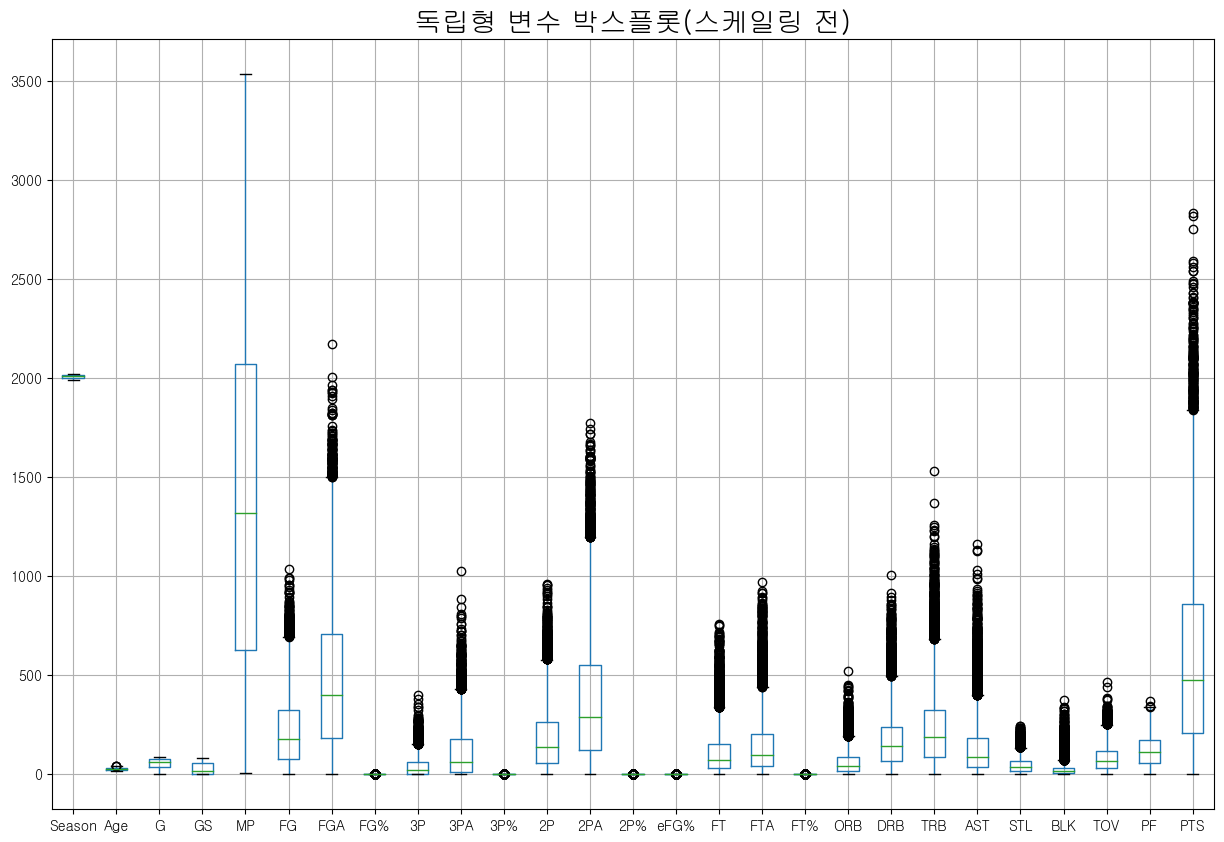

In [28]:
# 독립형 변수 박스플롯(스케일링 전)
%matplotlib inline
df1X.boxplot(column=['Season', 'Age','G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], figsize=(15, 10))
plt.title('독립형 변수 박스플롯(스케일링 전)', fontsize=20)
plt.savefig('./plot/독립형 변수 박스플롯(스케일링 전).png')
plt.show()

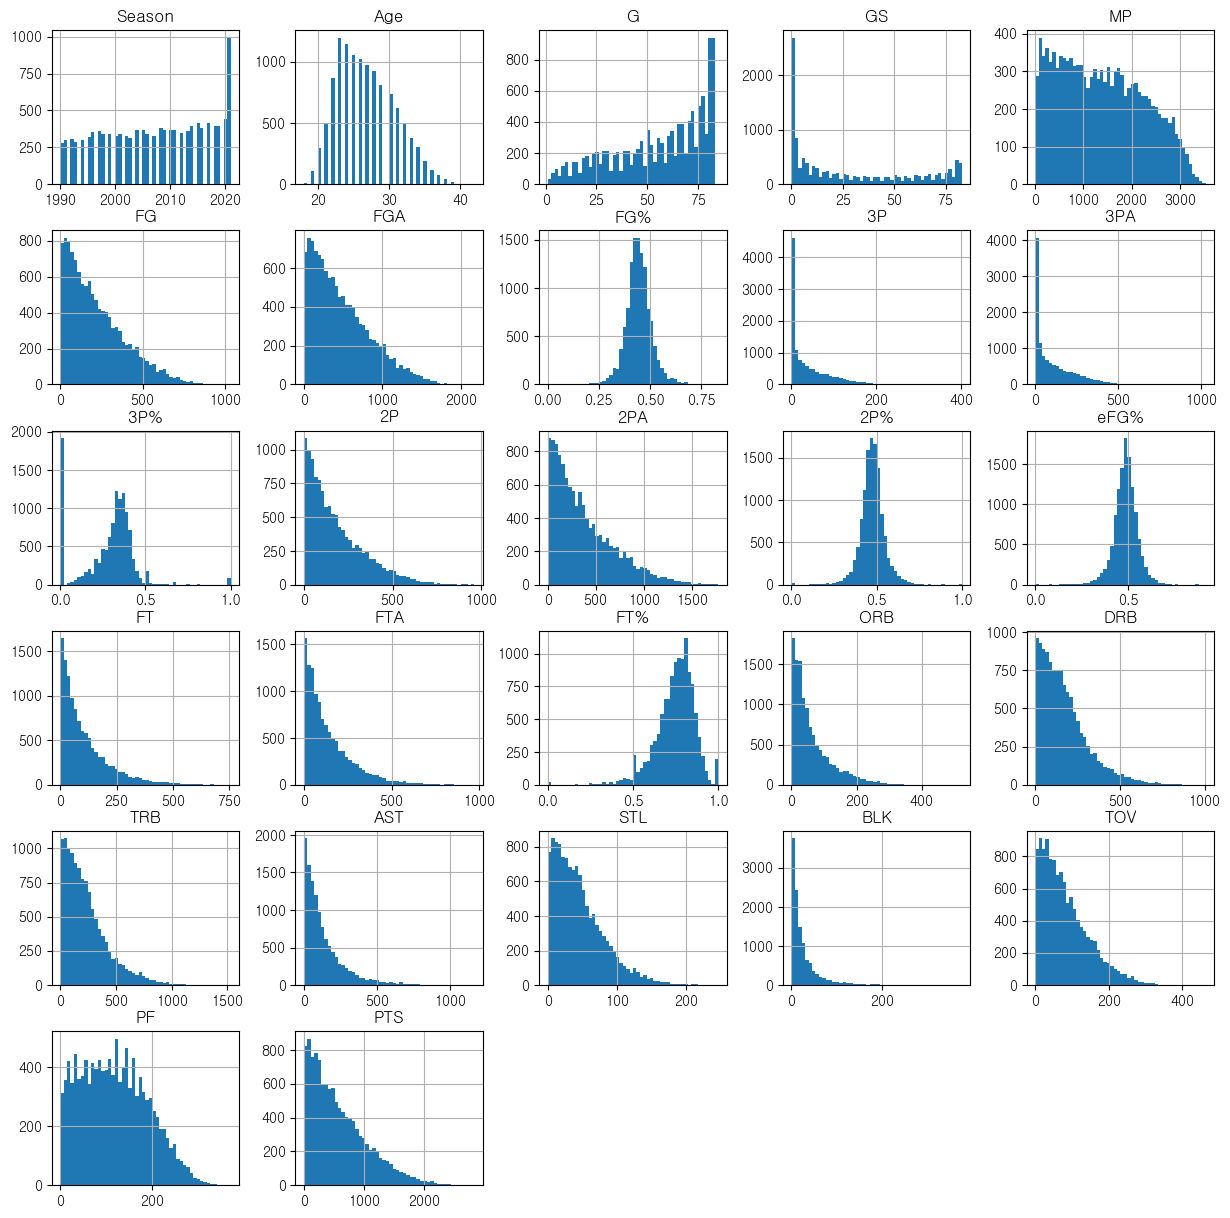

In [30]:
# 독립형 변수 히스토그램(스케일링 전)
df1X.hist(column=['Season', 'Age','G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], bins=50, figsize=(15, 15))
plt.title('독립형 변수 히스토그램(스케일링 전)', fontsize=20)
plt.savefig('./plot/독립형 변수 히스토그램(스케일링 전).png')
plt.show()

In [32]:
# 컬럼 순서 바꾸기
df1X = df1X[['Season', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

In [33]:
# 연속형 데이터와 범주형 데이터 구분
df1X1 = df1X.iloc[:, :3]
df1X2 = df1X.iloc[:, 3:]

In [34]:
# 이상치가 많기 때문에 RobustScaler를 사용하여 스케일링
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df1X2 = pd.DataFrame(scaler.fit_transform(df1X2), columns=df1X2.columns)
df1X2.shape

(11926, 25)

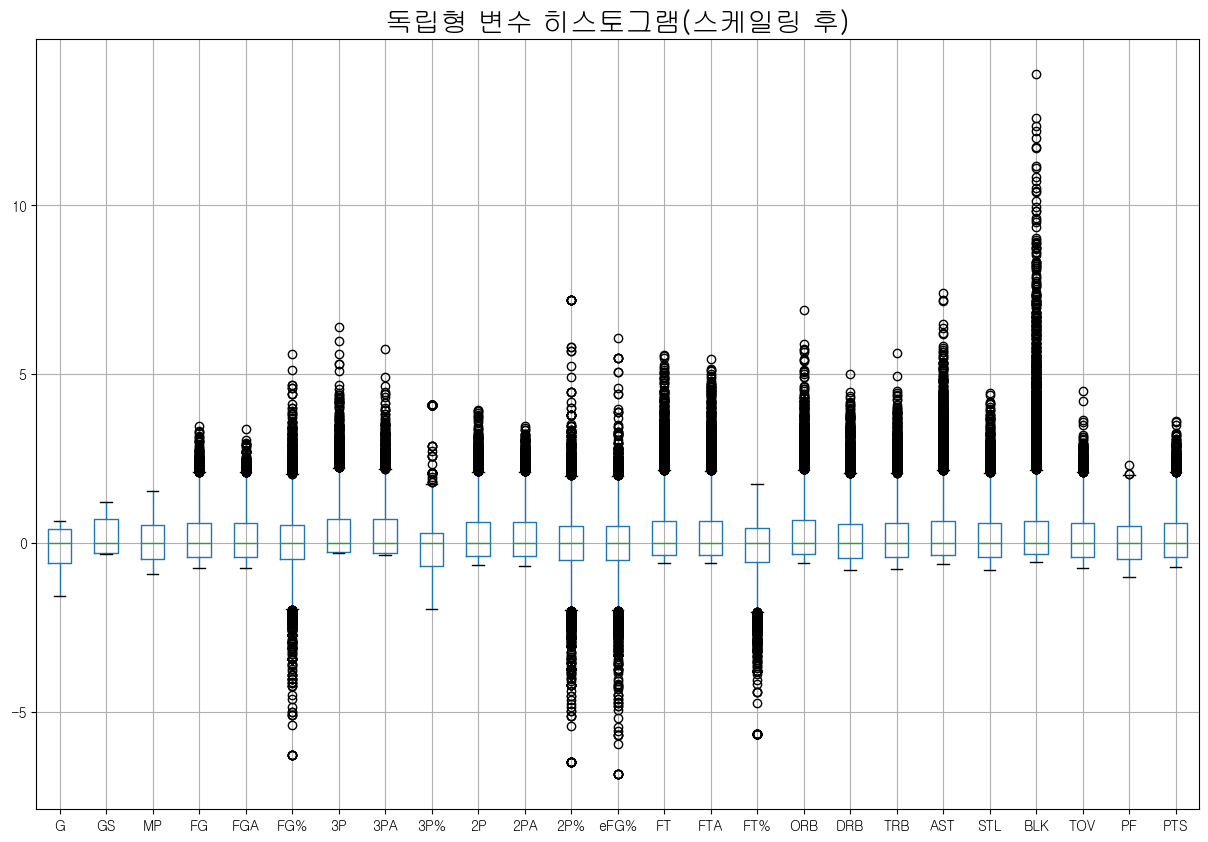

In [35]:
# 스케일링 후의 박스플롯
df1X2.boxplot(figsize=(15, 10))
plt.title('독립형 변수 히스토그램(스케일링 후)', fontsize=20)
plt.savefig('./plot/독립형 변수 히스토그램(스케일링 후).png')
plt.show()

In [36]:
# 독립형 변수 합치기
df1X = pd.concat([df1X1, df1X2], axis=1)
df1X.shape

(11926, 28)

## 범주형 변수

In [37]:
df1X

,Season,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1990,C,27.0,0.500000,0.592593,0.256801,-0.170905,-0.220114,0.614286,-0.266667,...,-0.533333,1.614286,0.786127,1.021990,-0.151724,-0.042553,0.384615,0.034091,1.196429,-0.174579
1,1990,PG,27.0,0.473684,1.037037,0.949229,0.887080,1.115750,-0.557143,2.316667,...,0.637037,0.114286,0.202312,0.159162,2.800000,1.765957,-0.461538,0.840909,0.169643,1.140888
2,1990,SF,30.0,0.447368,0.407407,0.474441,1.049847,0.943074,0.671429,0.200000,...,-0.059259,1.085714,0.271676,0.494241,0.386207,-0.085106,0.153846,0.613636,0.776786,0.954058
3,1990,PG,30.0,0.368421,0.925926,0.974874,1.326551,1.428843,-0.042857,1.483333,...,0.496296,0.400000,0.670520,0.582199,2.510345,1.595745,0.115385,1.340909,1.107143,1.326187
4,1990,PF,26.0,0.552632,-0.148148,0.396812,0.777213,0.728653,0.457143,-0.150000,...,0.355556,1.571429,0.473988,0.783246,0.365517,0.468085,0.923077,0.386364,0.937500,0.588055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11921,2021,PG,22.0,0.052632,0.833333,0.557616,1.249237,1.349146,-0.042857,1.950000,...,0.903704,-0.042857,0.381503,0.242932,3.482759,0.319149,-0.115385,2.204545,-0.026786,1.712098
11922,2021,C,28.0,-0.342105,0.055556,-0.218680,0.004069,-0.146110,1.685714,-0.250000,...,-0.370370,1.114286,0.393064,0.590576,-0.020690,-0.234043,0.076923,-0.181818,0.062500,-0.038285
11923,2021,C,28.0,-0.342105,0.055556,-0.218680,0.004069,-0.146110,1.685714,-0.250000,...,-0.370370,1.114286,0.393064,0.590576,-0.020690,-0.234043,0.076923,-0.181818,0.062500,-0.038285
11924,2021,C,23.0,0.289474,0.277778,0.199965,0.313327,-0.013283,3.014286,-0.300000,...,0.185185,2.114286,1.092486,1.390576,0.006897,-0.297872,1.807692,0.159091,0.651786,0.266462


In [38]:
# Pos
df1X = pd.concat([df1X, (pd.get_dummies(df1X['Pos'], prefix="pos"))], axis=1)
df1X.head()

,Season,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,pos_C,pos_PF,pos_PG,pos_SF,pos_SG
0,1990,C,27.0,0.500000,0.592593,0.256801,-0.170905,-0.220114,0.614286,-0.266667,...,-0.042553,0.384615,0.034091,1.196429,-0.174579,1,0,0,0,0
1,1990,PG,27.0,0.473684,1.037037,0.949229,0.887080,1.115750,-0.557143,2.316667,...,1.765957,-0.461538,0.840909,0.169643,1.140888,0,0,1,0,0
2,1990,SF,30.0,0.447368,0.407407,0.474441,1.049847,0.943074,0.671429,0.200000,...,-0.085106,0.153846,0.613636,0.776786,0.954058,0,0,0,1,0
3,1990,PG,30.0,0.368421,0.925926,0.974874,1.326551,1.428843,-0.042857,1.483333,...,1.595745,0.115385,1.340909,1.107143,1.326187,0,0,1,0,0
4,1990,PF,26.0,0.552632,-0.148148,0.396812,0.777213,0.728653,0.457143,-0.150000,...,0.468085,0.923077,0.386364,0.937500,0.588055,0,1,0,0,0


In [39]:
# 연속형 데이터 아닌 컬럼은 제거
df1X.drop(['Pos'], axis=1, inplace=True)

In [40]:
# 마지막 합치기
df2 = pd.concat([df1y, df1X], axis=1)
df2.shape

(11926, 33)

In [41]:
df2

,salary,Season,Age,G,GS,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,pos_C,pos_PF,pos_PG,pos_SF,pos_SG
0,996827.0,1990,27.0,0.500000,0.592593,0.256801,-0.170905,-0.220114,0.614286,-0.266667,...,-0.042553,0.384615,0.034091,1.196429,-0.174579,1,0,0,0,0
1,1881882.0,1990,27.0,0.473684,1.037037,0.949229,0.887080,1.115750,-0.557143,2.316667,...,1.765957,-0.461538,0.840909,0.169643,1.140888,0,0,1,0,0
2,2543393.0,1990,30.0,0.447368,0.407407,0.474441,1.049847,0.943074,0.671429,0.200000,...,-0.085106,0.153846,0.613636,0.776786,0.954058,0,0,0,1,0
3,1653775.0,1990,30.0,0.368421,0.925926,0.974874,1.326551,1.428843,-0.042857,1.483333,...,1.595745,0.115385,1.340909,1.107143,1.326187,0,0,1,0,0
4,1140535.0,1990,26.0,0.552632,-0.148148,0.396812,0.777213,0.728653,0.457143,-0.150000,...,0.468085,0.923077,0.386364,0.937500,0.588055,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11921,9080829.0,2021,22.0,0.052632,0.833333,0.557616,1.249237,1.349146,-0.042857,1.950000,...,0.319149,-0.115385,2.204545,-0.026786,1.712098,0,0,1,0,0
11922,2606136.0,2021,28.0,-0.342105,0.055556,-0.218680,0.004069,-0.146110,1.685714,-0.250000,...,-0.234043,0.076923,-0.181818,0.062500,-0.038285,1,0,0,0,0
11923,2606136.0,2021,28.0,-0.342105,0.055556,-0.218680,0.004069,-0.146110,1.685714,-0.250000,...,-0.234043,0.076923,-0.181818,0.062500,-0.038285,1,0,0,0,0
11924,8199677.0,2021,23.0,0.289474,0.277778,0.199965,0.313327,-0.013283,3.014286,-0.300000,...,-0.297872,1.807692,0.159091,0.651786,0.266462,1,0,0,0,0


## csv로 변환

In [42]:
df2.to_csv('./csv/preprocess.csv', index=None)